## Ctrap Data Visualization

In [1]:
%matplotlib widget
import oregano
import matplotlib.pyplot as plt
import os
import importlib
import numpy as np
import orion
from oregano import extract, miscellaneous
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib as mpl
from scipy.stats import gaussian_kde
mpl.rcParams['svg.fonttype'] = 'none'         # Keep SVG text as text (not paths)
mpl.rcParams['text.usetex'] = False  # Don’t use LaTeX rendering (mathtext/usetex often becomes paths)
mpl.rcParams['font.family'] = 'Arial'  # or Arial, Helvetica, etc.

In [2]:
path = orion.choose_folder()

Chosen folder: /Users/saradebraganca/Library/CloudStorage/OneDrive-Personal/CNB/PROJECTS/01--Project--OT-Curtains/DATA/CTRAP/SHORT-1_Ku/2025-03-11


In [3]:
files = oregano.access.get_files_in_directory(rootdir=path)
for n,f in enumerate(files): print(f'{n} --> {f}')

0 --> 20250311-143719 Kymograph 1.h5
1 --> 20250311-143732 Kymograph 2.h5
2 --> 20250311-144136 Kymograph 3.h5
3 --> 20250311-144200 Scan 4.h5
4 --> 20250311-144653 Kymograph 4.h5
5 --> 20250311-144931 Kymograph 5.h5
6 --> 20250311-145127 Kymograph 6.h5
7 --> 20250311-145233 Kymograph 7.h5
8 --> 20250311-145400 Kymograph 8.h5
9 --> 20250311-145431 Kymograph 9.h5
10 --> 20250311-145456 Kymograph 10.h5
11 --> 20250311-150334 Kymograph 11.h5
12 --> 20250311-160223 Kymograph 12.h5
13 --> 20250311-160325 Kymograph 13.h5
14 --> 20250311-160739 Kymograph 14.h5
15 --> 20250311-160802 Scan 7.h5
16 --> 20250311-160811 Kymograph 15.h5
17 --> 20250311-161331 Kymograph 16.h5
18 --> 20250311-161442 Kymograph 17.h5
19 --> 20250311-171340 Kymograph 18.h5
20 --> 20250311-171353 Kymograph 19.h5
21 --> 20250311-171534 Kymograph 20.h5
22 --> 20250311-173807 Kymograph 21.h5
23 --> 20250311-174207 Kymograph 22.h5
24 --> 20250311-174430 Kymograph 23.h5
25 --> 20250311-175005 Kymograph 24.h5
26 --> 20250311-1

In [4]:
# Introduce the number that corresponds to the file of interest:
number = 11

# -------------------
filename = files[number].split('.h5')[0]

#### Visualize the data and export:

In [ ]:
oregano.visualization.visualize_and_export_data(
    path, filename,
    figsize=(9, 5), #  figure size (in inches)
    axis='x', # scanning axis ('x' by default or 'y') --> Fx or Fy
    color_blue_as ='blue')

In [ ]:
i=0
outputpath = os.path.join(path, filename)
if not os.path.exists(outputpath): os.mkdir(outputpath)

In [ ]:
i+=1
plt.savefig(os.path.join(outputpath, f'{filename}_{i}.svg'))

#### Kymo in detail

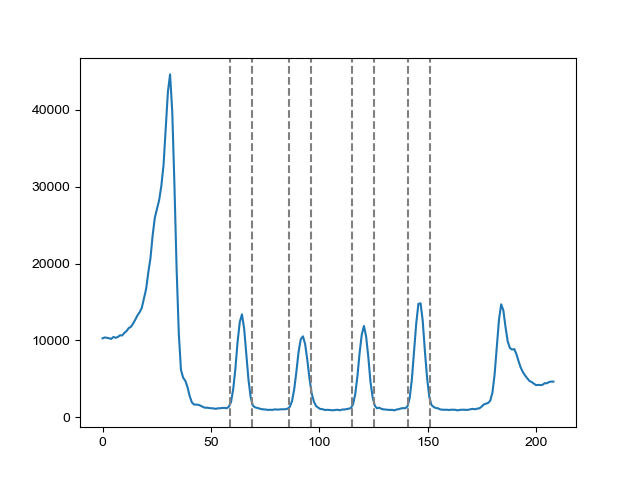

In [5]:
# KYMO ---- Adjust to get a better image.

# POP short
#channel = 'B'
#branchA = 169
#branchB = 222
#branchC = 278
#branchD = 332
#area = 10 

# Ku-short kymo
#channel = 'G'
#branchA = 155
#branchB = 209
#branchC = 267
#branchD = 318
#area = 20 

# Ku-long kymo
channel = 'G'
branchA = 59
branchB = 86
branchC = 115
branchD = 141
area = 10 

# Ku-20 bp long kymo
#channel = 'G'
#branchA = 59
#branchB = 89
#branchC = 118
#branchD = 146
#area = 10 

dataset = oregano.extract.get_data(path, filename, axis='x')
photons = dataset['photons'][channel]

photons_norm = (photons - np.min(photons)) / (np.max(photons) - np.min(photons))
photons_sum = np.sum(photons, axis=1)
x_pos = np.linspace(0, dataset['pixels_per_line'], dataset['pixels_per_line'])

fig, axs = plt.subplots()
axs.plot(x_pos, photons_sum)
for n, branch in enumerate([branchA, branchB, branchC, branchD]):
    axs.axvline(branch, color='grey', ls='--')
    axs.axvline(branch+area, color='grey', ls='--')

#axs.set_yscale('log')

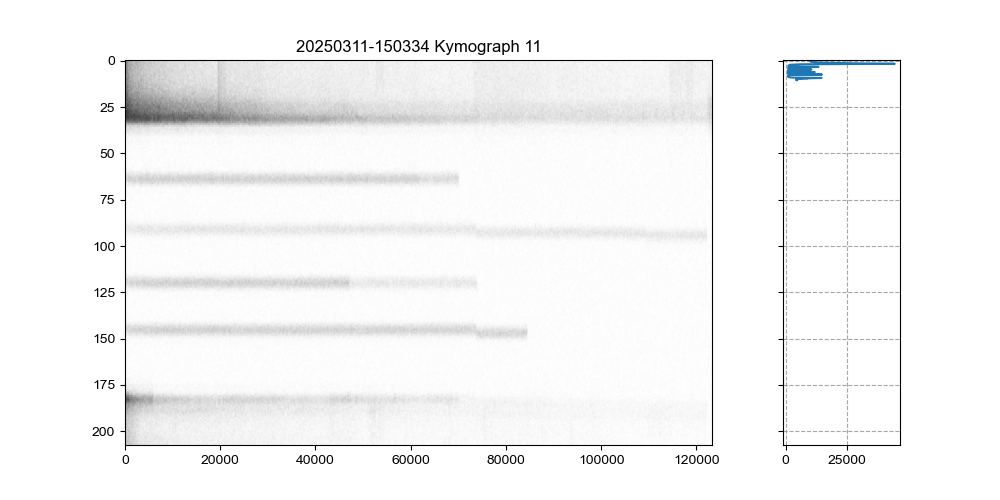

In [8]:
red_channel, green_channel, blue_channel = miscellaneous.create_color_maps(color_blue_as='cyan')
colors = {'R':red_channel, 'B':blue_channel, 'G': green_channel}

borders = (0, (dataset['time_per_line'] * dataset['time_lines']),
           dataset['pixel_size'] * dataset['pixels_per_line'], 0)
time = np.linspace(0, dataset['time_lines']*dataset['time_per_line'], dataset['time_lines'])
plt.close('all')
fig, axs = plt.subplots(figsize=(10,5), ncols=2, sharey=True, gridspec_kw={'width_ratios':(1,0.2)}) #  
axs[0].set_title(filename)

vmin, vmax = 0, 0.1
#axs[0].imshow(photons_norm, cmap=colors[channel], vmax=vmax, extent=borders, aspect='auto') #, aspect='equal'
axs[0].imshow(photons, cmap='Grays', vmin=vmin, vmax=vmax, aspect='auto') #, extent=borders, aspect='equal'

y_position = np.linspace(0, dataset['pixel_size'] * dataset['pixels_per_line'], dataset['pixels_per_line'])
axs[1].plot(np.sum(photons, axis=1), y_position)
axs[1].grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)

In [ ]:
outputpath = os.path.join(path, filename)
if not os.path.exists(outputpath): os.mkdir(outputpath)
plt.savefig(os.path.join(outputpath, f'2025-12-03_{filename}_kymo_grays.svg'))

In [ ]:
red_channel, green_channel, blue_channel = miscellaneous.create_color_maps(color_blue_as='cyan')
colors = {'R':red_channel, 'B':blue_channel, 'G': green_channel}
vmax = 0.01

borders = (0, dataset['time_per_line'] * dataset['time_lines'],
           dataset['pixel_size'] * dataset['pixels_per_line'], 0)
time = np.linspace(0, dataset['time_lines']*dataset['time_per_line'], dataset['time_lines'])/60

percentage_to_plot = 10
step = int(dataset['time_lines'] // (dataset['time_lines'] * (percentage_to_plot/100))) # plot only a % of the points

plt.close('all')
fig, axs = plt.subplots(figsize=(10,5), nrows=4, ncols=2, sharex = 'col', sharey='row', gridspec_kw={'width_ratios':(1,0.2)}) #  
axs[0,0].set_title('Averaged Image'+filename+f'_only-{percentage_to_plot}%-raw-data-plotted')

for n, branch in enumerate([branchA, branchB, branchC, branchD]):
    #axs[0].axhline(branch, color='grey', ls='--', lw=1)
    #axs[0].axhline(branch+area, color='grey', ls='--', lw=1)
    
    photons_area = np.sum(photons[branch:branch+area], axis=0)
    smooth = savgol_filter(photons_area, window_length=50, polyorder=1)  # Savitzky–Golay filter

    axs[n,0].plot(time[::step], photons_area[::step], color='green', lw=1, alpha=0.7)
    #axs[n+1,0].scatter(time, photons_area, color='green', s=0.5, alpha=0.7)
    axs[n,0].plot(time, smooth, color='black', lw=1)
    
    #axs[n+1,1].hist(smooth, bins=np.arange(min(smooth), max(smooth) + binwidth, binwidth), orientation='horizontal', align='mid')

    gkde = gaussian_kde(smooth)
    x = np.linspace(-5, 20, 1000)
    axs[n,1].plot(gkde(x), x, color='green', lw=1)

    um2 = area*dataset["pixel_size"]
    #axs[n+1,0].set(ylim=(-1,7), xlim=(0,time[-1]), xlabel = 'Time (s)', ylabel = f'Photons (#/{int(um2*1000)}nm2)') #, yticks=[0,5,10])
    axs[n,0].set(ylim=(-1,7), xlim=(0,time[-1]), ylabel = f'Photons (#/{int(um2*1000)}nm2)', yticks=[0,2,4,6])

    for a in [axs[n,0], axs[n,1]]:
        a.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)
        #for l in [63, 45, 28, 4]: a.axhline(l, 0, 1, linestyle='--', color='red', alpha=0.7, linewidth=0.5)
axs[-1,0].set(xlabel = 'Time (min)')


In [ ]:
outputpath = os.path.join(path, filename)
if not os.path.exists(outputpath): os.mkdir(outputpath)

In [ ]:
plt.savefig(os.path.join(outputpath, f'2025-12-03_{filename}_photon-counts.svg'))

#### Scan in detail

In [ ]:
# AddAB : scan 24

number = 12

frame_range = [9,117]

channel = 'G'

baseline = 18
branchA = 26    
branchB = 52
branchC = 83
branchD = 111
area = 25   #lines
baseline_area = 5

branch_limit = 30

In [ ]:
# AddAB : scan 34, +ATP

number = 22

frame_range = [3,58]

channel = 'G'

baseline = 128
branchA = 17    
branchB = 45
branchC = 74
branchD = 100
area = 25
baseline_area = 5

branch_limit = 30

In [ ]:
# ParB : 2025-10-07 scan 12

frame_range = [15,74]
channel = 'G'

baseline = 47
branchA = 54    
branchB = 85
branchC = 112
branchD = 140
area = 25
baseline_area = 5

branch_limit = 20

In [ ]:
# ParB : 2025-10-07 scan 22

frame_range = [15,74]
channel = 'G'

baseline = 47
branchA = 54    
branchB = 85
branchC = 112
branchD = 140
area = 25
baseline_area = 5

branch_limit = 20

In [ ]:
# KpnI : 2025-10-08 scan10

number = 9

frame_range = [3,314]
channel = 'G'

baseline = 47
branchA = 57    
branchB = 84
branchC = 113
branchD = 140
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan13

number = 12

frame_range = [0,64]
channel = 'G'

baseline = 47
branchA = 57    
branchB = 84
branchC = 113
branchD = 140
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan15

number = 14

frame_range = [4,234]
channel = 'G'

baseline = 160
branchA = 49    
branchB = 77
branchC = 105
branchD = 131
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan17

number = 15

frame_range = [0,341]
channel = 'G'

baseline = 45
branchA = 53    
branchB = 81
branchC = 107
branchD = 133
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan22

number = 18

frame_range = [0,222]
channel = 'G'

baseline = 41
branchA = 50    
branchB = 79
branchC = 106
branchD = 133
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan25

number = 21

frame_range = [0,305]
channel = 'G'

baseline = 160
branchA = 49    
branchB = 77
branchC = 105
branchD = 131
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
# KpnI : 2025-10-08 scan28

number = 24

frame_range = [0,253]
channel = 'G'

baseline = 156
branchA = 46    
branchB = 75
branchC = 105
branchD = 131
area = 25
baseline_area = 5

branch_limit = 35

In [ ]:
filename = files[number].split('.h5')[0]
dataset = oregano.extract.get_data(path, filename, axis='x')
borders = (0, dataset['pixels_per_line'] * dataset['pixel_size'],
           dataset['lines_per_frame'] * dataset['pixel_size'], 0)

In [ ]:
# Define the branch areas 
if frame_range == 'all':
    photons_mean = np.mean(dataset['photons'][channel], axis=0)
else:
    photons_mean = np.mean(dataset['photons'][channel][frame_range[0]:frame_range[1]], axis=0)
photons_norm = (photons_mean - np.min(photons_mean)) / (np.max(photons_mean) - np.min(photons_mean))

red_channel, green_channel, blue_channel = miscellaneous.create_color_maps(color_blue_as='cyan')
colors = {'R':red_channel, 'B':blue_channel, 'G': green_channel}
vmax = 0.1

plt.close('all')
fig, axs = plt.subplots(figsize=(7,2)) #, nrows=2, sharex=True, gridspec_kw={'height_ratios':(1,1)})
axs.set_title('Averaged Image'+filename)
axs.imshow(photons_norm, cmap=colors[channel], aspect='equal', vmax=vmax) #, extent=borders)

# baseline
axs.axvline(baseline, color='white', ls='--')
axs.axvline(baseline+baseline_area, color='white', ls='--')
# branches
for branch in [branchA, branchB, branchC, branchD]:
    if branch is not None:
        axs.axvline(branch, color='grey', ls='--')
        axs.axvline(branch+area, color='grey', ls='--')
        #axs[n+1].imshow(photons_mean[::, branch:branch+area], cmap=colors[channel], aspect='equal', vmax=vmax)

In [ ]:
# visualise a single frame defined by user
frame = 50
photons = dataset['photons'][channel][frame]

plt.close('all')
fig, axs = plt.subplots(figsize=(10,2), sharey=True)
axs.set_title(filename+f' frame#{frame}')
axs.imshow(photons, cmap=green_channel, aspect='equal', vmax=100)

# baseline
axs.axvline(baseline, color='white', ls='--')
axs.axvline(baseline+baseline_area, color='white', ls='--')
# branches
for branch in [branchA, branchB, branchC, branchD]:
    if branch is not None:
        axs.axvline(branch, color='grey', ls='--')
        axs.axvline(branch+area, color='grey', ls='--')

In [ ]:
def extract_branch_details(photons, branch, area, branch_limit, baseline_shift_pos, baseline_smooth):
        pos_lines = np.linspace(0, len(photons), len(photons))
        photons_sum = np.sum(photons[::, branch:branch+area], axis=1)
        photons_smooth = savgol_filter(photons_sum, window_length=5, polyorder=3)
        # --- find max peak and align
        max_value = np.max(photons_smooth)
        idx_max = np.where(photons_smooth == max_value)[0][0]
        shift_pos = pos_lines - idx_max
        # --- Create a common x grid
        x_min = min(baseline_shift_pos.min(), shift_pos.min())
        x_max = max(baseline_shift_pos.max(), shift_pos.max())
        x_common = np.linspace(x_min, x_max, int(x_max-x_min))
        # --- Interpolate onto common grid (fills with zeros outside range)
        interp_baseline = interp1d(baseline_shift_pos, baseline_smooth, kind='linear', bounds_error=False, fill_value=0)
        interp_photons = interp1d(shift_pos, photons_sum, kind='linear', bounds_error=False, fill_value=0)
        interp_smooth = interp1d(shift_pos, photons_smooth, kind='linear', bounds_error=False, fill_value=0)
        baseline_align_interp = interp_baseline(x_common)
        photons_align_interp = interp_photons(x_common)
        smooth_align_interp = interp_smooth(x_common)
        # --- find new index for max peak
        max_value = np.max(smooth_align_interp)
        idx_max = np.where(smooth_align_interp == max_value)[0][0]
        # --- find end of branch
        #idx_end = np.where(smooth_align_interp[idx_max::] < 20)[0][0]   # finds end moving forward
        # finds idx_end starting from the end
        cond = smooth_align_interp[idx_max:] > branch_limit
        rev_idx = np.where(cond[::-1])[0][0]
        idx_end = len(cond) - rev_idx - 1 + idx_max
        # length 
        length = idx_end - idx_max
        return photons_align_interp, smooth_align_interp, x_common, idx_max, idx_end, length


plt.close('all')
fig, ax = plt.subplots(figsize=(9,6), ncols=5, sharey=True, sharex=True)
ax[0].invert_yaxis()   
ax[0].set(ylabel='Pixel Coordinate')

for a in ax: a.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)

# Baseline
photons_sum = np.sum(photons[::, baseline:baseline+baseline_area], axis=1)
baseline_smooth = savgol_filter(photons_sum, window_length=5, polyorder=3)  # Savitzky–Golay filter
max_value = np.max(baseline_smooth)
i_max = np.where(baseline_smooth == max_value)[0][0]
pos_lines = np.linspace(0, len(photons), len(photons))
baseline_shift_pos = pos_lines - i_max
ax[0].scatter(photons_sum, baseline_shift_pos, s=4, color='black', alpha=1)
ax[0].plot(baseline_smooth, baseline_shift_pos, color='blue', ls='-', lw=1, label='Baseline')
ax[0].legend(loc='upper left', fontsize=8)
ax[0].set(xlabel='Photons')

i=1

for label, branch in zip('ABCD', [branchA, branchB, branchC, branchD]):
    photons_align_interp, smooth_align_interp, x_common, idx_max, idx_end, length = extract_branch_details(photons, branch, area, branch_limit, baseline_shift_pos, baseline_smooth)
    ax[i].scatter(photons_align_interp, x_common, s=4, color='black', alpha=1)
    ax[i].plot(smooth_align_interp, x_common, color='blue', ls='-', lw=1, label='Branch '+label)
    ax[i].axhline(x_common[idx_max], color='red', ls='--')
    ax[i].axhline(x_common[idx_end], color='red', ls='--')
    ax[i].annotate(idx_max, (max_value/5, x_common[idx_max]-1), fontsize=8, color='red')
    ax[i].annotate(idx_end, (max_value/5, x_common[idx_end]-1), fontsize=8, color='red')
    ax[i].annotate(f'length={length}px', (max_value/2, x_common[idx_end]-4), fontsize=8, color='red')
    ax[i].set(xlabel='Photons')
    ax[i].legend(loc='upper left', fontsize=8)
    i+=1
ax[0].annotate(f'{dataset['pixel_size']}um/px', (0.4, 0.1), xycoords='axes fraction', fontsize=8, color='black')

In [ ]:
outputpath = os.path.join(path, filename)
if not os.path.exists(outputpath): os.mkdir(outputpath)
plt.savefig(os.path.join(outputpath, f'{filename}_branch-length.svg'))

In [ ]:
current_frame, end_frame = frame_range
diff = end_frame - current_frame

length_data = pd.DataFrame(index=np.arange(0, diff+1), columns=['Frame', 'Branch A', 'Branch B', 'Branch C', 'Branch D'])

i = 0
while current_frame <= end_frame:
    photons = dataset['photons']['G'][current_frame]
    pos_lines = np.linspace(0, len(photons), len(photons))
    row = [current_frame]
    # Baseline
    photons_sum = np.sum(photons[::, baseline:baseline+baseline_area], axis=1)
    baseline_smooth = savgol_filter(photons_sum, window_length=5, polyorder=3)  # Savitzky–Golay filter
    max_value = np.max(photons_sum)
    i_max = np.where(photons_sum == max_value)[0][0]
    baseline_shift_pos = pos_lines - i_max
    
    for label, branch in zip('ABCD', [branchA, branchB, branchC, branchD]):
        outputs = extract_branch_details(photons, branch, area, branch_limit, baseline_shift_pos, baseline_smooth)
        photons_align_interp, smooth_align_interp, x_common, idx_max, idx_end, length = outputs
        row += [length] # --- add branch length to row

    # --- drop data to dataframe
    length_data.loc[i] = row
    i += 1
    current_frame += 1        

In [ ]:
length_data

In [ ]:
conversion_nm_to_bp = 0.135 #0.06 pN

fig, axs = plt.subplots(figsize=(5,5), nrows=4, sharex=True)
pixel_size = dataset['pixel_size']

for n,(branch,ini,fin) in enumerate(zip(['Branch A', 'Branch B', 'Branch C', 'Branch D'],
                                        [0,0,0,22], [21,21,21,52])):
    # Ensure numeric arrays
    frames = (length_data['Frame'] - length_data['Frame'].iloc[0]).to_numpy(dtype=float)
    length = ((length_data[branch].to_numpy(dtype=float)) * pixel_size)*1000
    axs[n].plot(frames, length) #, label=branch)
    """
    # linear fit
    x_fit = frames[ini:fin]
    y_fit = length[ini:fin]
    slope, intercept = np.polyfit(frames[ini:fin], length[ini:fin], 1)
    fit = slope * x_fit + intercept
    axs[n].plot(x_fit, fit, linestyle='--', lw=1, color='black',
                 label=f'Slope = {round(slope,2)} nm/frame ={round(slope/conversion_nm_to_bp, 2)} bp/s')

    axs[n].grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)
    axs[n].set(ylabel='L (nm)', ylim=(500, 2000))
    axs[n].legend(fontsize=8, loc='lower left')
    """
axs[-1].set(xlabel='Time Frame')

In [ ]:
outputpath = os.path.join(path, filename)
if not os.path.exists(outputpath): os.mkdir(outputpath)

In [ ]:
plt.savefig(os.path.join(outputpath, f'{filename}_2015-11-16_AddAD rates.svg'))

In [ ]:
#results = []
results += [length_data]

In [ ]:
len(results)

In [ ]:
for i, data in enumerate(results):
    data.to_csv(os.path.join(path, f'overall-branch-reduction-{i}.csv'), sep='\t', index=False)  

In [ ]:
plt.close('all')
fig, axs = plt.subplots(figsize=(10,3), nrows=4, sharex=True)

i = 0
data = results[6]
pixel_size = dataset['pixel_size']
for n, branch in enumerate(['Branch A', 'Branch B', 'Branch C', 'Branch D']): 
    axs[n].scatter(data['Frame']-data['Frame'][0], data[branch]*pixel_size, s=1)
    #axs.plot(con_ATP['Frame']-con_ATP['Frame'][0], con_ATP[branch]*pixel_size, label=branch+'+ATP')
    smooth = savgol_filter(data[branch]*pixel_size, window_length=5, polyorder=2)
    axs[n].plot(data['Frame']-data['Frame'][0], smooth, label=branch)
    axs[n].set(ylabel=f'Branch Length (um)', ylim=(0, 2.2))
    axs[n].grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)
    axs[n].legend()
axs[-1].set(xlabel='Time Frame') 
line = 0.55
#axs.axhline(line, 0, 1, ls= '--', color= 'black')

In [ ]:
meanA = np.mean(data['Branch A'][::20]*pixel_size)
meanB = np.mean(data['Branch B'][::50]*pixel_size)
meanC = None #np.mean(data['Branch C'][::20]*pixel_size)
meanD = None #np.mean(data['Branch D'][::100]*pixel_size)
meanA, meanB, meanC, meanD

In [ ]:
#initial = []
initial += [meanA, meanB, meanC, meanD]
initial

In [ ]:
initial = [x for x in initial if x is not None]
initial

In [ ]:
#cuts = []
cuts += [meanA, meanB, meanC, meanD] #, meanextra]
cuts

In [ ]:
extensions_after_cut = [x for x in cuts if x is not None]
extensions_after_cut

In [ ]:
initial = [np.float64(0.9625),
 np.float64(1.475),
 np.float64(1.1624999999999999),
 np.float64(1.0000000000000002),
 np.float64(0.9642857142857144),
 np.float64(1.4642857142857142),
 np.float64(1.8),
 np.float64(1.8142857142857143),
 np.float64(1.0874999999999997),
 np.float64(1.0458333333333332),
 np.float64(1.9625000000000001),
 np.float64(0.9708333333333333),
 np.float64(1.8527777777777779),
 np.float64(1.5),
 np.float64(1.1944444444444442),
 np.float64(1.8500000000000003),
 np.float64(1.5666666666666667),
 np.float64(1.55),
 np.float64(1.55),
 np.float64(1.4333333333333333),
 np.float64(1.0379032258064516),
 np.float64(1.675),
 np.float64(1.0363636363636364),
 np.float64(1.4888888888888887),
 np.float64(0.838888888888889),
 np.float64(1.9333333333333336),
 np.float64(1.911111111111111)]

In [ ]:
extensions_after_cut = [np.float64(0.5434999999999999),
 np.float64(0.515),
 np.float64(0.5229999999999998),
 np.float64(0.6162500000000002),
 np.float64(0.6905000000000002),
 np.float64(0.6991666666666668),
 np.float64(0.6955000000000006),
 np.float64(0.6529999999999997),
 np.float64(0.6480000000000004),
 np.float64(0.7410000000000001),
 np.float64(0.725),
 np.float64(0.6975),
 np.float64(0.6558333333333332),
 np.float64(0.7439999999999999),
 np.float64(0.7300000000000001),
 np.float64(0.7774999999999999),
 np.float64(0.8054999999999999),
 np.float64(1.0984999999999996),
 np.float64(1.3785000000000012),
 np.float64(0.7320000000000004)]

In [ ]:
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


plt.close('all')
fig, axs = plt.subplots()

# CUTS ------
bin_edges = np.arange(0, 2.5, 0.1)
counts, edges, _ = axs.hist(extensions_after_cut, bins=bin_edges, edgecolor='white', align='mid')
bin_centers = (edges[:-1] + edges[1:]) / 2
# gaussian -----
p0 = [max(counts), bin_centers[np.argmax(counts)], np.std(extensions_after_cut)]
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=p0)
A, mu, sigma = popt
x_fit = np.linspace(0.2, 1.2, 300)
y_fit = gaussian(x_fit, A, mu, sigma)
axs.plot(x_fit, y_fit, color='red', lw=2, label='Gaussian fit')


axs.legend()

axs.set(ylabel='Counts', xlabel='Branch extension after digestion (µm)', xlim=(0, 2.5))
axs.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.8)

In [ ]:
plt.savefig(os.path.join(path, f'2025-11-16_HistogramBranchLengthCuts.svg'))